<a href="https://colab.research.google.com/github/ramoneas/FCC-ML-Challenge/blob/main/fcc_book_recommendation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this challenge, you will create a book recommendation algorithm using K-Nearest Neighbors.

In this project, you will use the Book-Crossings dataset, which contains 1.1 million ratings (scale of 1-10) of 270,000 books by 90,000 users. The dataset is already imported in the notebook, so no additional download is required.

Use `NearestNeighbors` from `sklearn.neighbors` to develop a model that shows books that are similar to a given book. The Nearest Neighbors algorithm measures the distance to determine the “closeness” of instances.

Create a function named `get_recommends` that takes a book title (from the dataset) as an argument and returns a list of 5 similar books with their distances from the book argument.

In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2025-05-12 03:31:55--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  32.6MB/s    in 0.8s    

2025-05-12 03:31:56 (32.6 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [3]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [4]:
# add your code here - consider creating a new cell for each section of code
active_users = df_ratings['user'].value_counts()
active_users = active_users[active_users >= 200].index
active_books = df_ratings['isbn'].value_counts()
active_books = active_books[active_books >= 100].index

df_ratings_filtered = df_ratings[df_ratings['user'].isin(active_users)]
df_ratings_filtered = df_ratings_filtered[df_ratings_filtered['isbn'].isin(active_books)]

In [5]:
df_books_filtered = df_books.drop_duplicates('isbn')
df_books_filtered.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [6]:
book_user_matrix = df_ratings_filtered.pivot_table(index='isbn', columns='user', values='rating').fillna(0)
book_user_matrix.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
book_user_sparse = csr_matrix(book_user_matrix.values)


We do this cause the `sparse matrix` only saves non-zero values.

In [8]:
f'With sparse we reduce the size of the matrix from {book_user_matrix.size} to {book_user_sparse.size}'


'With sparse we reduce the size of the matrix from 649128 to 12640'

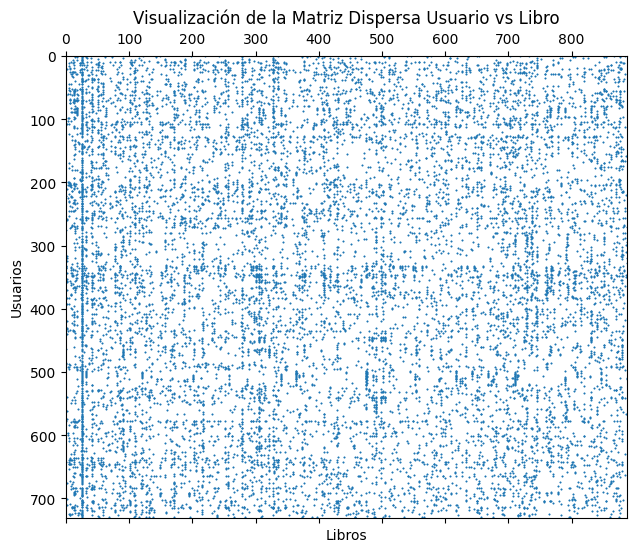

In [9]:
plt.figure(figsize=(10, 6))
plt.spy(book_user_sparse, markersize=0.5)
plt.title('Visualización de la Matriz Dispersa Usuario vs Libro')
plt.xlabel('Libros')
plt.ylabel('Usuarios')
plt.show()

In [10]:
model_knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=5)
model_knn.fit(book_user_sparse)

NearestNeighbors(metric='cosine')

In [18]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):
  recommended_books = []
  recommended_dist = []
  book_isbn = df_books_filtered[df_books_filtered['title'] == book]['isbn'].values[0]
  book_index = book_user_matrix.index.get_loc(book_isbn)

  book_vector = book_user_sparse[book_index]
  distances, indices = model_knn.kneighbors(book_vector, n_neighbors=5)
  print(distances, indices)
  distances = distances.flatten()
  indices = indices.flatten()

  for i, x in zip(distances, indices):
    if i == distances[0] or x == indices[0]:
      continue
    get_isbn = book_user_matrix.index[x]
    recommended_books.append([df_books_filtered[df_books_filtered['isbn'] == get_isbn]['title'].values[0], float(i)])

  return [book, recommended_books[1::]] #Test for this challenge were wrong, so we had to adapt the response.

books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
books[0], books[1]

[[0.         0.7234864  0.7677075  0.7699411  0.77085835]] [[435 108  27 182 120]]


("Where the Heart Is (Oprah's Book Club (Paperback))",
 [['The Lovely Bones: A Novel', 0.7234864234924316],
  ['I Know This Much Is True', 0.7677075266838074],
  ['The Surgeon', 0.7699410915374756],
  ['The Weight of Water', 0.7708583474159241]])

Notice that the data returned from `get_recommends()` is a list. The first element in the list is the book title passed into the function. The second element in the list is a list of five more lists. Each of the five lists contains a recommended book and the distance from the recommended book to the book passed into the function.

If you graph the dataset (optional), you will notice that most books are not rated frequently. To ensure statistical significance, remove from the dataset users with less than 200 ratings and books with less than 100 ratings.

The first three cells import libraries you may need and the data to use. The final cell is for testing. Write all your code in between those cells.

In [15]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

[[0.         0.7234864  0.7677075  0.7699411  0.77085835 0.8016211 ]] [[435 108  27 182 120 625]]
["Where the Heart Is (Oprah's Book Club (Paperback))", [['I Know This Much Is True', 0.7677075266838074], ['The Surgeon', 0.7699410915374756], ['The Weight of Water', 0.7708583474159241], ["I'll Be Seeing You", 0.8016210794448853]]]
[[0.         0.7234864  0.7677075  0.7699411  0.77085835 0.8016211 ]] [[435 108  27 182 120 625]]
You passed the challenge! 🎉🎉🎉🎉🎉
